# 1. Import and Checks

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**1.1. Import Transaction Dataset**

In [76]:
# Importing Sales dataset
transaction_data = pd.read_csv(r"C:\Users\Ellen\Desktop\Maurcex\CSV files\DA Sales_Encoded 25 02.csv")
transaction_data['Order_Date'] = pd.to_datetime(transaction_data['Order_Date'], format='mixed')
transaction_data['Return_Date'] = pd.to_datetime(transaction_data['Return_Date'], format='mixed')
transaction_data

,phone_encoded,Customer_id_encoded,Amount_Including_VAT,Order_Date,Return_Date,location_encoded,transaction_id_encoded
0,1528,3864,-135.0,2024-12-28,2025-01-13,421e5f1c,5ab145ef
1,1528,4719,51.0,2023-06-06,2000-01-01,f3a00157,3f84e133
2,1528,6584,95.0,2023-10-27,2000-01-01,Online_Sales,31ed25d4
3,1528,9793,58.0,2023-06-19,2000-01-01,fb72e28e,47cf0e03
4,1528,3102,23.0,2023-11-01,2000-01-01,Online_Sales,1409aa5f
...,...,...,...,...,...,...,...
58371,1,1760,55.0,2024-11-19,2000-01-01,436a35c0,6ff3c91b
58372,1,2449,385.0,2024-09-17,2000-01-01,caddbc5a,87fbb47f
58373,1,1760,32.0,2024-11-19,2000-01-01,436a35c0,6ff3c91b
58374,1,1760,160.0,2024-11-19,2000-01-01,436a35c0,6ff3c91b


**1.2. Import Communciation Dataset**

In [78]:
# Importing Communications dataset
communication_data = pd.read_csv(r"C:\Users\Ellen\Desktop\Maurcex\CSV files\DA Outbound_Encoded 25 02.csv")
communication_data

,phone_encoded,number_of_messages,has_response,id of conversation,date_of_communication,location_encoded
0,177,6,True,1105642,2024-01-04 16:26:49,65751190
1,241,14,True,1116444,2024-01-11 13:42:21,67f6beac
2,177,10,True,1116617,2024-01-11 16:43:18,67f6beac
3,426,8,True,1117247,2024-01-12 11:16:16,67f6beac
4,177,3,False,1144892,2024-01-22 11:04:02,67f6beac
...,...,...,...,...,...,...
4814,1344,2,False,1982439,2024-12-30 16:38:21,f3a00157
4815,1182,2,False,1982440,2024-12-30 16:38:21,f3a00157
4816,892,2,False,1982441,2024-12-30 16:38:21,f3a00157
4817,1442,2,False,1982442,2024-12-30 16:38:21,f3a00157


In [86]:
# Convert 'date_of_communication' to datetime format
import pandas as pd

communication_data['date_of_communication'] = pd.to_datetime(communication_data['date_of_communication'], errors='coerce')

# Check the result
print(communication_data[['phone_encoded', 'date_of_communication']].head())

   phone_encoded date_of_communication
0            177   2024-01-04 16:26:49
1            241   2024-01-11 13:42:21
2            177   2024-01-11 16:43:18
3            426   2024-01-12 11:16:16
4            177   2024-01-22 11:04:02


# 2. Data Cleaning
**2.1. Handling missing values**

In [88]:
# Check for missing values in the transaction data
missing_transaction_data = transaction_data.isnull().sum()

# Display columns with missing values
print(missing_transaction_data[missing_transaction_data > 0])

Amount_Including_VAT    50
dtype: int64


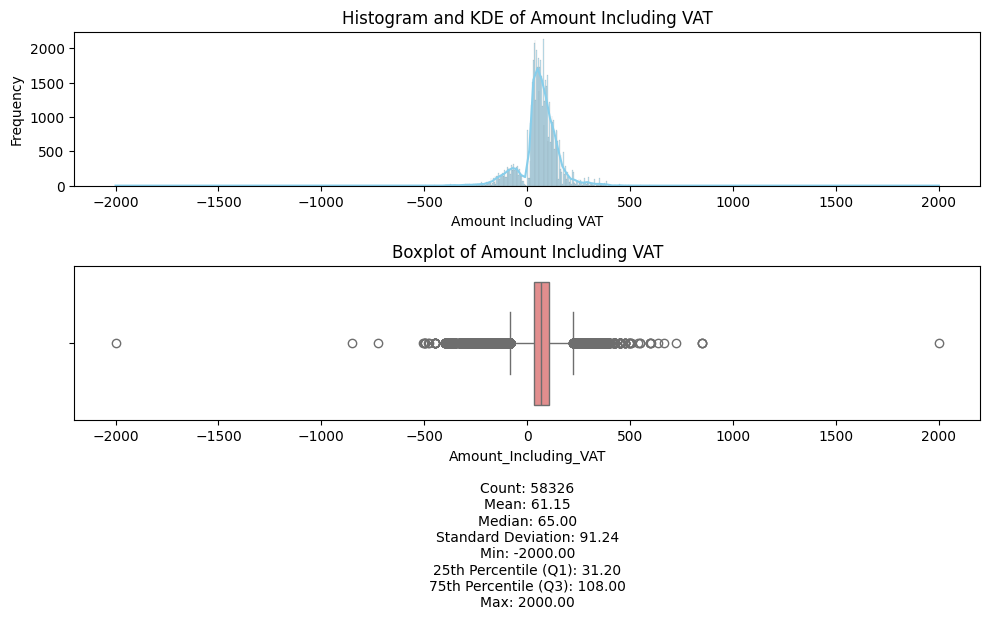

In [90]:
# Checking distribution to impute missing values
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing values for visualization
valid_vat = transaction_data['Amount_Including_VAT'].dropna()

# Get summary statistics
summary_stats = valid_vat.describe()

# Extract key metrics
mean_value = summary_stats['mean']
median_value = summary_stats['50%']
std_dev = summary_stats['std']
min_value = summary_stats['min']
max_value = summary_stats['max']
q1 = summary_stats['25%']
q3 = summary_stats['75%']

# Set up the figure
plt.figure(figsize=(10, 8))

# Histogram with KDE
plt.subplot(2, 1, 1)
sns.histplot(valid_vat, kde=True, color='skyblue')
plt.title('Histogram and KDE of Amount Including VAT')
plt.xlabel('Amount Including VAT')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(2, 1, 2)
sns.boxplot(x=valid_vat, color='lightcoral')
plt.title('Boxplot of Amount Including VAT')

# Add text with summary statistics
summary_text = (
    f"Count: {summary_stats['count']:.0f}\n"
    f"Mean: {mean_value:.2f}\n"
    f"Median: {median_value:.2f}\n"
    f"Standard Deviation: {std_dev:.2f}\n"
    f"Min: {min_value:.2f}\n"
    f"25th Percentile (Q1): {q1:.2f}\n"
    f"75th Percentile (Q3): {q3:.2f}\n"
    f"Max: {max_value:.2f}"
)

# Adjust the text position to be below the boxplot
plt.text(x=0.5, y=-0.4, s=summary_text, ha='center', va='top', transform=plt.gca().transAxes)

# Adjust layout
plt.tight_layout(rect=[0, 0.1, 1, 0.95])  # Leave space for the text
plt.show()

In [92]:
# Calculate the mean
mean_vat = transaction_data['Amount_Including_VAT'].mean()

In [94]:
transaction_data['Amount_Including_VAT'] = transaction_data['Amount_Including_VAT'].fillna(mean_vat)

In [96]:
# Double checking for missing values again in the transaction data
missing_transaction_data = transaction_data.isnull().sum()

# Display columns with missing values
print(missing_transaction_data[missing_transaction_data > 0])

Series([], dtype: int64)


In [99]:
# Check for missing values in the communication data
missing_communication_data = communication_data.isnull().sum()

# Display columns with missing values
print(missing_communication_data[missing_communication_data > 0])

Series([], dtype: int64)


**2.2. Checking for blank rows** 

In [159]:
# Check for rows with any blank values (NaN or empty strings) in any column
blank_rows = transaction_data[transaction_data.isna().any(axis=1) | (transaction_data == '').any(axis=1)]

In [161]:
# Check for rows with any blank values (NaN or empty strings) in any column
blank_rows = communication_data[communication_data.isna().any(axis=1) | (communication_data == '').any(axis=1)]

**2.3. Handling Data Types** 

In [108]:
# Check the data types of each column
print(transaction_data.dtypes)

phone_encoded                      int64
Customer_id_encoded                int64
Amount_Including_VAT             float64
Order_Date                datetime64[ns]
Return_Date               datetime64[ns]
location_encoded                  object
transaction_id_encoded            object
dtype: object


In [110]:
# Check the data types of each column
print(communication_data.dtypes)

phone_encoded                     int64
number_of_messages                int64
has_response                       bool
id of conversation                int64
date_of_communication    datetime64[ns]
location_encoded                 object
dtype: object


**2.4. Standardize Columns to Lower Case** 

In [112]:
# Verify the column names
print(transaction_data.columns)

Index(['phone_encoded', 'Customer_id_encoded', 'Amount_Including_VAT',
       'Order_Date', 'Return_Date', 'location_encoded',
       'transaction_id_encoded'],
      dtype='object')


In [114]:
# Standardize column names: lowercase and replace spaces with underscores
transaction_data.columns = transaction_data.columns.str.lower().str.replace(' ', '_')

# Verify the column names
print(transaction_data.columns)

Index(['phone_encoded', 'customer_id_encoded', 'amount_including_vat',
       'order_date', 'return_date', 'location_encoded',
       'transaction_id_encoded'],
      dtype='object')


In [120]:
# Convert 'location_encoded' column values to lowercase
transaction_data['location_encoded'] = transaction_data['location_encoded'].str.lower()

# Check the result to confirm
print(transaction_data[['phone_encoded', 'location_encoded']].head())

   phone_encoded location_encoded
0           1528         421e5f1c
1           1528         f3a00157
2           1528     online_sales
3           1528         fb72e28e
4           1528     online_sales


In [122]:
# Verify the column names
print(communication_data.columns)

Index(['phone_encoded', 'number_of_messages', 'has_response',
       'id of conversation', 'date_of_communication', 'location_encoded'],
      dtype='object')


In [124]:
# Standardize column names: lowercase and replace spaces with underscores
communication_data.columns = communication_data.columns.str.lower().str.replace(' ', '_')

# Verify the column names
print(communication_data.columns)

Index(['phone_encoded', 'number_of_messages', 'has_response',
       'id_of_conversation', 'date_of_communication', 'location_encoded'],
      dtype='object')


In [126]:
# Replace TRUE/FALSE with true/false in the 'has_response' column
communication_data['has_response'] = communication_data['has_response'].replace({True: 'true', False: 'false'})

# Verify the changes
print(communication_data[['has_response']].head(20))

   has_response
0          true
1          true
2          true
3          true
4         false
5          true
6          true
7          true
8          true
9         false
10        false
11         true
12         true
13        false
14        false
15         true
16         true
17         true
18        false
19         true


**2.6. Handling Duplicate Values**

In [136]:
# Check for duplicates in transaction_data based on 'Transaction_ID' (encoded)
duplicates_transaction_data = transaction_data[transaction_data.duplicated(subset=['transaction_id_encoded'])]

# Print number of duplicate rows and display them
print(f"Number of duplicate rows in transaction_data (by Transaction_ID_encoded): {duplicates_transaction_data.shape[0]}")
print(duplicates_transaction_data.head())  # Show the first few duplicate rows

Number of duplicate rows in transaction_data (by Transaction_ID_encoded): 22490
    phone_encoded  customer_id_encoded  amount_including_vat order_date  \
5            1528                 3102                  37.0 2023-11-01   
6            1528                 3102                  47.0 2023-11-01   
8            1528                 3102                  59.0 2023-07-31   
9            1528                 3102                  33.0 2023-07-31   
13           1528                 3102                  69.0 2023-09-22   

   return_date location_encoded transaction_id_encoded  
5   2000-01-01     online_sales               1409aa5f  
6   2000-01-01     online_sales               1409aa5f  
8   2000-01-01     online_sales               3880059e  
9   2000-01-01     online_sales               3880059e  
13  2000-01-01     online_sales               50b0b4b5  


In [141]:
# Check duplicates by Transaction_ID_encoded and inspect other columns
duplicates_info = transaction_data[transaction_data.duplicated(subset=['transaction_id_encoded'], keep=False)]

# Inspect the duplicated rows for insight into why duplicates might exist
print(duplicates_info[['transaction_id_encoded', 'phone_encoded', 'customer_id_encoded', 'amount_including_vat', 'order_date', 'return_date', 'location_encoded']].head(20))


   transaction_id_encoded  phone_encoded  customer_id_encoded  \
4                1409aa5f           1528                 3102   
5                1409aa5f           1528                 3102   
6                1409aa5f           1528                 3102   
7                3880059e           1528                 3102   
8                3880059e           1528                 3102   
9                3880059e           1528                 3102   
12               50b0b4b5           1528                 3102   
13               50b0b4b5           1528                 3102   
14               ddaee0d4           1528                 5145   
15               f3de61c3           1528                 4719   
16               f3de61c3           1528                 4719   
17               50b0b4b5           1528                 3102   
18               50b0b4b5           1528                 3102   
19               e9d3c3fd           1528                 4719   
20               e9d3c3fd

# Attention ('transaction_data'): 
**Not removing duplicates in 'transaction_id_encoded' column**

- Given that the **'customer_id_encoded' and 'amount_including_vat'** values are different for the **'same transaction_id_encoded'**, it suggests that these are not errors but rather represent distinct purchases or transactions linked to the same 'transaction_id_encoded'.

- Different customer_id_encoded values mean different customers are involved, even if they share the same transaction_id_encoded. The variations in amounts could indicate different amounts for the same transaction **(e.g. partial payments or different purchase details for the same overall transaction).**

- With no other way to confirm, I will assume these are **separate purchases/ purchases split into multiple payments or orders**, it makes sense to keep them as separate rows, each representing a valid transaction.

In [164]:
# Check for duplicates in communication_data based on 'id_of_conversation'
duplicates_communication_data = communication_data[communication_data.duplicated(subset=['id_of_conversation'], keep=False)]

# Print number of duplicate rows and display them
print(f"Number of duplicate rows in communication_data (by id_of_conversation): {duplicates_communication_data.shape[0]}")
print(duplicates_communication_data.head())  # Show the first few duplicate rows

Number of duplicate rows in communication_data (by id_of_conversation): 0
Empty DataFrame
Columns: [phone_encoded, number_of_messages, has_response, id_of_conversation, date_of_communication, location_encoded]
Index: []


# 3. Merging the Datasets

In [200]:
# Perform an inner join to keep only customers with both purchase and communication data
mercaux_customer = pd.merge(transaction_data, communication_data, on='phone_encoded', how='inner')

# Verify the number of rows after the inner join
print(mercaux_customer.shape)

(135957, 12)


In [178]:
# Check for duplicates in the merged data
duplicates = mercaux_customer[mercaux_customer.duplicated(keep=False)]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.shape[0]}")

# Optionally, display some of the duplicate rows
print(duplicates.head())

Number of duplicate rows: 14595
    phone_encoded  customer_id_encoded  amount_including_vat order_date  \
21           1517                  368                 102.0 2024-06-18   
22           1517                  368                 102.0 2024-06-18   
23           1517                  368                 102.0 2024-06-18   
24           1517                  368                 102.0 2024-06-18   
30           1515                 1753                  99.0 2024-04-09   

   return_date location_encoded_x transaction_id_encoded  number_of_messages  \
21  2000-01-01           67f6beac               decdb3d6                   1   
22  2000-01-01           67f6beac               decdb3d6                   1   
23  2000-01-01           67f6beac               decdb3d6                   1   
24  2000-01-01           67f6beac               decdb3d6                   1   
30  2000-01-01           436a35c0               6270a35f                   2   

   has_response  id_of_conversation 

In [180]:
# Check if there are duplicates in 'transaction_id_encoded' after the merge
duplicates_in_transaction = mercaux_customer[mercaux_customer.duplicated(subset=['phone_encoded', 'transaction_id_encoded'], keep=False)]

# Print the number of rows with duplicates
print(f"Number of duplicate rows based on 'transaction_id_encoded' and 'phone_encoded': {duplicates_in_transaction.shape[0]}")

Number of duplicate rows based on 'transaction_id_encoded' and 'phone_encoded': 131540


In [186]:
# Check for duplicates based on 'phone_encoded' and 'transaction_id_encoded'
duplicates = mercaux_customer[mercaux_customer.duplicated(subset=['phone_encoded', 'transaction_id_encoded'], keep=False)]

# Print the number of duplicate rows
print(f"Number of duplicate rows based on 'phone_encoded' and 'transaction_id_encoded': {duplicates.shape[0]}")
print(duplicates.head())

# Check for interactions with the same 'transaction_id_encoded' and 'phone_encoded' but different dates
multiple_interactions = mercaux_customer[mercaux_customer.duplicated(subset=['phone_encoded', 'transaction_id_encoded', 'date_of_communication'], keep=False)]

# Print number of multiple interactions
print(f"Number of multiple interactions for the same transaction: {multiple_interactions.shape[0]}")
print(multiple_interactions.head())

Number of duplicate rows based on 'phone_encoded' and 'transaction_id_encoded': 131540
   phone_encoded  customer_id_encoded  amount_including_vat order_date  \
0           1526                 1255                 124.0 2024-07-29   
1           1526                 1255                  40.0 2024-07-29   
2           1526                 1255                  36.0 2024-07-29   
4           1523                 1503                 396.0 2024-07-28   
5           1523                 1503                  53.6 2024-07-28   

  return_date location_encoded_x transaction_id_encoded  number_of_messages  \
0  2000-01-01           67f6beac               f646a9eb                   1   
1  2000-01-01           67f6beac               f646a9eb                   1   
2  2000-01-01           67f6beac               f646a9eb                   1   
4  2000-01-01           67f6beac               c3189de5                   1   
5  2000-01-01           67f6beac               c3189de5                  

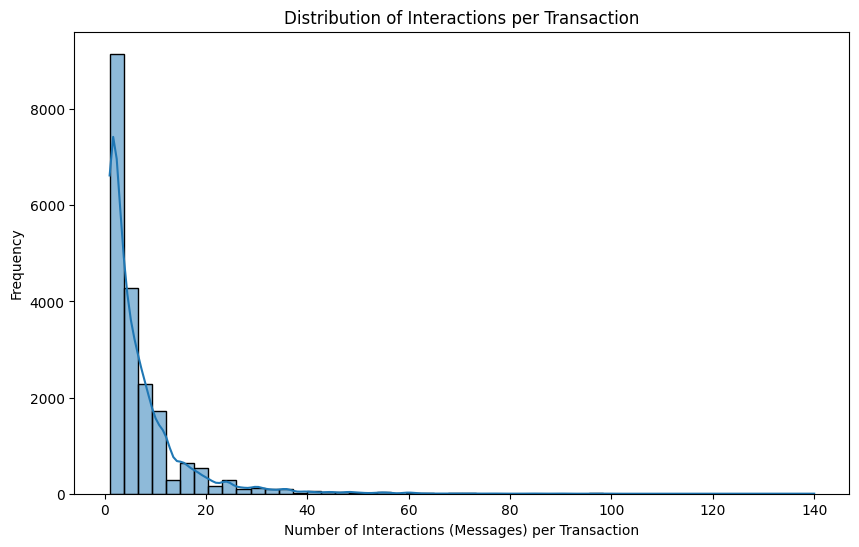

Number of outliers (transactions with unusually high number of messages): 1680
Sample of outliers (transactions with unusually high number of messages):
   transaction_id_encoded  number_of_messages
4                001821ec                  68
14               00303466                  30
15               003041bf                  45
23               003c8c87                  40
24               0040087a                  20


In [190]:
# Counting interactions and Detecting Outliers

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Count the number of interactions per transaction
interaction_count_per_transaction = mercaux_customer.groupby('transaction_id_encoded')['number_of_messages'].count().reset_index()

# 2. Check for anomalies by visualizing the distribution
# Plot the distribution of interactions per transaction
plt.figure(figsize=(10, 6))
sns.histplot(interaction_count_per_transaction['number_of_messages'], bins=50, kde=True)
plt.title('Distribution of Interactions per Transaction')
plt.xlabel('Number of Interactions (Messages) per Transaction')
plt.ylabel('Frequency')
plt.show()

# 3. Detecting outliers using IQR (Interquartile Range)
Q1 = interaction_count_per_transaction['number_of_messages'].quantile(0.25)
Q3 = interaction_count_per_transaction['number_of_messages'].quantile(0.75)
IQR = Q3 - Q1

# Defining outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering rows where the number of interactions is outside the bounds
outliers = interaction_count_per_transaction[(interaction_count_per_transaction['number_of_messages'] < lower_bound) | 
                                              (interaction_count_per_transaction['number_of_messages'] > upper_bound)]

# 4. Output the number of outliers
print(f"Number of outliers (transactions with unusually high number of messages): {outliers.shape[0]}")

# 5. Optionally, display a few of the outliers
print("Sample of outliers (transactions with unusually high number of messages):")
print(outliers.head())


In [192]:
# Filter for invalid entries where the number of messages is greater than 23
invalid_message_entries = mercaux_customer[mercaux_customer['number_of_messages'] > 23]

# Print out the number of invalid rows and a sample of them
print(f"Number of invalid rows (number_of_messages > 23): {invalid_message_entries.shape[0]}")
print(invalid_message_entries[['transaction_id_encoded', 'number_of_messages']].head())

# Or cap them to 23
mercaux_customer['number_of_messages'] = mercaux_customer['number_of_messages'].apply(lambda x: 23 if x > 23 else x)


Number of invalid rows (number_of_messages > 23): 0
Empty DataFrame
Columns: [transaction_id_encoded, number_of_messages]
Index: []


In [194]:
# Group by transaction_id_encoded and count the number of messages for each transaction
interaction_counts = mercaux_customer.groupby('transaction_id_encoded')['number_of_messages'].sum()

# Find any transactions with multiple interactions (i.e., >1 message for the same transaction)
multiple_interactions = interaction_counts[interaction_counts > 1]

# Show the number of such transactions
print(f"Number of transactions with multiple interactions: {multiple_interactions.shape[0]}")
print(multiple_interactions.head())

Number of transactions with multiple interactions: 18196
transaction_id_encoded
00086f29      5
001382ab     15
0015769e      8
001821ec    168
00182f08      5
Name: number_of_messages, dtype: int64


In [202]:
# Check for duplicates based on 'id_of_conversation'
duplicates_conversation = mercaux_customer[mercaux_customer.duplicated(subset=['id_of_conversation'], keep=False)]

# Print the number of duplicate rows and a sample of them
print(f"Number of duplicate rows based on 'id_of_conversation': {duplicates_conversation.shape[0]}")
print(duplicates_conversation.head())  # Show the first few duplicate rows

Number of duplicate rows based on 'id_of_conversation': 135883
   phone_encoded  customer_id_encoded  amount_including_vat order_date  \
0           1526                 1255                 124.0 2024-07-29   
1           1526                 1255                  40.0 2024-07-29   
2           1526                 1255                  36.0 2024-07-29   
3           1526                 1255                  58.0 2024-07-30   
4           1523                 1503                 396.0 2024-07-28   

  return_date location_encoded_x transaction_id_encoded  number_of_messages  \
0  2000-01-01           67f6beac               f646a9eb                   1   
1  2000-01-01           67f6beac               f646a9eb                   1   
2  2000-01-01           67f6beac               f646a9eb                   1   
3  2000-01-01           67f6beac               747e9b21                   1   
4  2000-01-01           67f6beac               c3189de5                   1   

  has_response  i

In [206]:
# Identify how many unique conversations exist
unique_conversations = mercaux_customer['id_of_conversation'].nunique()
print(f"Number of unique conversations: {unique_conversations}")

Number of unique conversations: 3814


In [214]:
# Rename the columns for better clarity
mercaux_customer.rename(columns={'location_encoded_x': 'location_encoded_left', 'location_encoded_y': 'location_encoded_right'}, inplace=True)

**Creating New Aggregated Dataset**

In [220]:
# Aggregate the data by 'id_of_conversation'
aggregated_data = mercaux_customer.groupby('id_of_conversation').agg({
    'number_of_messages': 'sum',  # Sum the number of messages
    'has_response': lambda x: x.mode()[0] if not x.mode().empty else 'false',  # Most frequent response
    'location_encoded_left': lambda x: x.mode()[0] if not x.mode().empty else 'unknown',  # Most frequent location from transactions
    'location_encoded_right': lambda x: x.mode()[0] if not x.mode().empty else 'unknown',  # Most frequent location from communications
    'amount_including_vat': 'sum',  # Sum the amounts
    'order_date': 'first',  # Keep the first order date
    'transaction_id_encoded': 'first',  # Keep the first transaction ID for reference
    'return_date': lambda x: 'no_return' if (x == '2000-01-01').all() else x.max(),  # Keep 'no_return' if all returns are '2000-01-01', else take latest return date
    'date_of_communication': 'min'  # Keep the first communication date
}).reset_index()

# Check the result
print(aggregated_data.head())

   id_of_conversation  number_of_messages has_response location_encoded_left  \
0             1116444                 742         true              caddbc5a   
1             1117247                  16         true              10a46a4a   
2             1149956                 135         true              9ae67770   
3             1150044                  78         true              c25dda79   
4             1150045                   6        false              c25dda79   

  location_encoded_right  amount_including_vat order_date  \
0               67f6beac                966.85 2023-04-20   
1               67f6beac                 79.50 2023-06-08   
2               9ae67770               1523.65 2023-06-12   
3               c25dda79               1698.50 2023-04-30   
4               c25dda79                521.00 2023-07-17   

  transaction_id_encoded          return_date date_of_communication  
0               8d40af76  2023-05-18 00:00:00   2024-01-11 13:42:21  
1           

# 4. Exploratory Data Analysis

**A/B Testing: Control Group vs Test Group**

In [534]:
mercaux_customer

,phone_encoded,customer_id_encoded,amount_including_vat,order_date,return_date,location_encoded_left,transaction_id_encoded,number_of_messages,has_response,id_of_conversation,date_of_communication,location_encoded_right
0,1526,1255,124.00,2024-07-29,2000-01-01,67f6beac,f646a9eb,1,0,1661701,2024-07-30 11:26:40,67f6beac
1,1526,1255,40.00,2024-07-29,2000-01-01,67f6beac,f646a9eb,1,0,1661701,2024-07-30 11:26:40,67f6beac
2,1526,1255,36.00,2024-07-29,2000-01-01,67f6beac,f646a9eb,1,0,1661701,2024-07-30 11:26:40,67f6beac
3,1526,1255,58.00,2024-07-30,2000-01-01,67f6beac,747e9b21,1,0,1661701,2024-07-30 11:26:40,67f6beac
4,1523,1503,396.00,2024-07-28,2000-01-01,67f6beac,c3189de5,1,0,1661690,2024-07-30 11:07:12,67f6beac
...,...,...,...,...,...,...,...,...,...,...,...,...
135952,11,6586,-151.52,2023-11-24,2023-04-12,online_sales,0ef2709c,1,0,1805414,2024-10-23 09:41:32,09304a38
135953,11,6586,214.38,2023-10-28,2000-01-01,online_sales,c1e8e902,1,0,1773958,2024-10-11 14:44:37,09304a38
135954,11,6586,214.38,2023-10-28,2000-01-01,online_sales,c1e8e902,1,0,1805414,2024-10-23 09:41:32,09304a38
135955,3,376,15.20,2024-07-23,2000-01-01,67f6beac,514466eb,1,0,1661658,2024-07-30 10:39:16,67f6beac


In [527]:
# Convert 'has_response' to binary (1 for 'true', 0 for 'false')
mercaux_customer['has_response'] = mercaux_customer['has_response'].map({'true': 1, 'false': 0})

# Create control and test groups again
control_group = mercaux_customer[mercaux_customer['has_response'] == 0]  # No response
test_group = mercaux_customer[mercaux_customer['has_response'] == 1]  # Responded to message

# Check the number of customers in each group
print(f"Number of customers in the control group: {control_group.shape[0]}")
print(f"Number of customers in the test group: {test_group.shape[0]}")

Number of customers in the control group: 93816
Number of customers in the test group: 42141


In [538]:
import pandas as pd

# Create a 'days_to_purchase' column based on the 'return_date'
# Convert the 'return_date' to datetime
mercaux_customer['return_date'] = pd.to_datetime(mercaux_customer['return_date'], errors='coerce')

# Calculate 'days_to_purchase' (days between communication and return)
# We'll use '2000-01-01' as a flag for "no return" and treat it as a non-purchase
mercaux_customer['days_to_purchase'] = (mercaux_customer['return_date'] - mercaux_customer['date_of_communication']).dt.days

# Replace 'NaT' or 'no return' with a placeholder value (e.g., -1 or a suitable flag)
mercaux_customer['days_to_purchase'] = mercaux_customer['days_to_purchase'].fillna(-1)

# Now split the data into control and test groups
control_group = mercaux_customer[mercaux_customer['has_response'] == 0]  # No response (control group)
test_group = mercaux_customer[mercaux_customer['has_response'] == 1]  # Responded to message (test group)

# Compare average purchase amounts between test and control groups
avg_purchase_control = control_group['amount_including_vat'].mean()
avg_purchase_test = test_group['amount_including_vat'].mean()

print(f"Average purchase amount for control group: {avg_purchase_control}")
print(f"Average purchase amount for test group: {avg_purchase_test}")


Average purchase amount for control group: 65.95810224268781
Average purchase amount for test group: 60.78676277259677


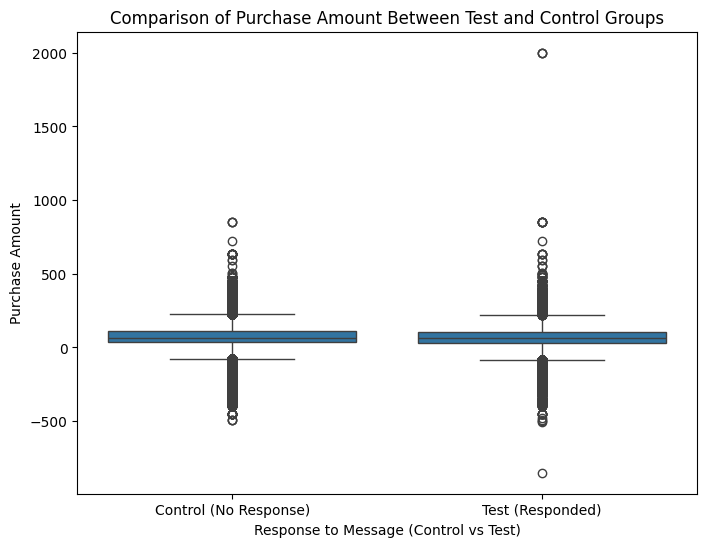

Summary Statistics for Purchase Amount by Group:
                count       mean        std    min   25%   50%     75%     max
has_response                                                                  
0             93816.0  65.958102  89.089272 -495.0  34.0  67.0  110.00   850.0
1             42141.0  60.786763  93.075545 -850.0  30.0  63.2  106.25  2000.0


In [544]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Plotting the comparison of purchase amounts between test and control groups
plt.figure(figsize=(8, 6))
sns.boxplot(x='has_response', y='amount_including_vat', data=mercaux_customer)
plt.title('Comparison of Purchase Amount Between Test and Control Groups')
plt.xlabel('Response to Message (Control vs Test)')
plt.ylabel('Purchase Amount')
plt.xticks([0, 1], ['Control (No Response)', 'Test (Responded)'])
plt.show()

# 2. Summary statistics for the comparison of purchase amounts
purchase_stats = mercaux_customer.groupby('has_response')['amount_including_vat'].describe()

# Print the summary statistics
print("Summary Statistics for Purchase Amount by Group:")
print(purchase_stats)

**Key Insights Summary**

**1. The control group (93,816 customers):** Consisted of those who did not respond to messages,, they had an average purchase amount of **65.96 usd.** Purchase amounts in this group range from -495 to 850 dollars, with a notable standard deviation of 89.09, indicating substantial **variability in customer spending behavior** within this group.

**2. The test group (42,141 customers):** Were those who responded to messages, they had a **slightly lower average purchase amount of 60.79 usd.** The purchase amounts in this group range from -850 to 2000 dollars, with a standard deviation of $93.08, reflecting a similar degree of variability, but with a **broader range in spending** compared to the control group.

The variability in spending observed in both groups suggests that external factors, such as **customer preferences, engagement intensity, or other influences,** play a significant role in purchasing decisions, and responses to messages alone may not fully explain the differences in spending.

**Linear Regression Model**

The linear regression model was created to assess the relationship between the number of messages sent to customers, their response to the messages, and their purchase amounts, aiming to understand how engagement influences purchasing behavior.

In [550]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare features (X) and target (y)
X = mercaux_customer[['number_of_messages', 'has_response']]  # Independent variables
y = mercaux_customer['amount_including_vat']  # Target: amount spent or other metric

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
print(f"Model R^2: {model.score(X_test, y_test)}")

# Optionally, print the coefficients for further interpretation
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Model R^2: 0.0009712946436317704
Model Coefficients: [-0.04257096 -2.109296  ]
Model Intercept: 64.21210614801039


In [568]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Convert 'amount_including_vat' into binary (e.g., large purchase = 1, small purchase = 0)
threshold = 100  # Example threshold for large purchases
mercaux_customer['purchase_above_threshold'] = (mercaux_customer['amount_including_vat'] > threshold).astype(int)

# Prepare features and target
X = mercaux_customer[['number_of_messages', 'has_response']]  # Features: number of messages and response
y = mercaux_customer['purchase_above_threshold']  # Target: whether the purchase was above the threshold

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict the results
y_pred = model.predict(X_test_scaled)

# Evaluate the model using classification metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7148


In [570]:
# Optionally, print the coefficients for further interpretation
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Model Coefficients: [[ 0.02700497 -0.0658942 ]]
Model Intercept: [-0.93479318]


**Key Insights Summary**
- The regression model shows a **weak positive relationship** between the number of messages sent and the likelihood of a purchase, with a coefficient of 0.0270. This suggests that as the number of messages increases, the chances of a customer making a purchase slightly increase, though the **effect is minimal.**
- The "has_response" variable has a small negative coefficient of -0.0659, indicating that customers who respond to messages are slightly less likely to make a purchase above the threshold, but the impact is negligible.

Overall, the **model's accuracy of 71.48%** and low R² value suggest that customer engagement, in terms of message volume and response, **does not have a strong influence** on purchasing behavior. Other factors beyond engagement, such as product or customer-specific variables, may be more significant in driving purchase decisions.

**Aggregated Dataset for communications on sales**

In [242]:
aggregated_data.head()

,id_of_conversation,number_of_messages,has_response,location_encoded_left,location_encoded_right,amount_including_vat,order_date,transaction_id_encoded,return_date,date_of_communication,days_to_purchase
0,1116444,742,true,caddbc5a,67f6beac,966.85,2023-04-20,8d40af76,2023-05-18 00:00:00,2023-01-11 13:42:21,98
1,1117247,16,true,10a46a4a,67f6beac,79.50,2023-06-08,0d586613,no_return,2023-01-12 11:16:16,146
2,1149956,135,true,9ae67770,9ae67770,1523.65,2023-06-12,5f30c030,2024-09-30 00:00:00,2023-01-23 16:28:35,139
3,1150044,78,true,c25dda79,c25dda79,1698.50,2023-04-30,c07c8c39,2023-04-30 00:00:00,2023-01-23 17:29:10,96
4,1150045,6,false,c25dda79,c25dda79,521.00,2023-07-17,326cb1fd,no_return,2023-01-23 17:29:20,174


In [246]:
aggregated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3814 entries, 0 to 3813
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id_of_conversation      3814 non-null   int64         
 1   number_of_messages      3814 non-null   int64         
 2   has_response            3814 non-null   object        
 3   location_encoded_left   3814 non-null   object        
 4   location_encoded_right  3814 non-null   object        
 5   amount_including_vat    3814 non-null   float64       
 6   order_date              3814 non-null   datetime64[ns]
 7   transaction_id_encoded  3814 non-null   object        
 8   return_date             3814 non-null   object        
 9   date_of_communication   3814 non-null   datetime64[ns]
 10  days_to_purchase        3814 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(5)
memory usage: 327.9+ KB


In [250]:
aggregated_data.describe()

,id_of_conversation,number_of_messages,amount_including_vat,order_date,date_of_communication,days_to_purchase
count,3.814000e+03,3814.000000,3814.000000,3814,3814,3814.000000
mean,1.745528e+06,69.154955,2294.058807,2024-01-04 03:11:02.611431424,2023-09-21 14:33:04.878343168,104.057420
min,1.116444e+06,1.000000,-1721.000000,2023-01-01 00:00:00,2023-01-11 13:42:21,-355.000000
25%,1.710244e+06,15.000000,686.000000,2023-07-03 00:00:00,2023-08-23 07:45:44.249999872,-68.750000
50%,1.765928e+06,30.000000,1581.300000,2024-01-07 00:00:00,2023-10-03 16:04:16.500000,109.000000
75%,1.839411e+06,65.000000,2817.000000,2024-06-25 00:00:00,2023-11-13 15:33:15.500000,279.750000
max,1.982443e+06,3408.000000,31821.900000,2024-12-24 00:00:00,2023-12-30 16:38:21,664.000000
std,1.296716e+05,155.576976,2754.006987,NaN,NaN,212.317977


**Time between Communication and Purchase**

In [229]:
# Calculate time between communication and purchase
aggregated_data['days_to_purchase'] = (aggregated_data['order_date'] - aggregated_data['date_of_communication']).dt.days

# Display the first few rows to check the result
print(aggregated_data[['id_of_conversation', 'date_of_communication', 'order_date', 'days_to_purchase']].head())

   id_of_conversation date_of_communication order_date  days_to_purchase
0             1116444   2024-01-11 13:42:21 2023-04-20              -267
1             1117247   2024-01-12 11:16:16 2023-06-08              -219
2             1149956   2024-01-23 16:28:35 2023-06-12              -226
3             1150044   2024-01-23 17:29:10 2023-04-30              -269
4             1150045   2024-01-23 17:29:20 2023-07-17              -191


In [231]:
# Fixing negative date values
# Update the year of 'date_of_communication' from 2024 to 2023
aggregated_data['date_of_communication'] = aggregated_data['date_of_communication'].apply(lambda x: x.replace(year=2023) if pd.notna(x) else x)

# Recalculate the time between communication and purchase
aggregated_data['days_to_purchase'] = (aggregated_data['order_date'] - aggregated_data['date_of_communication']).dt.days

# Display the first few rows to check the result
print(aggregated_data[['id_of_conversation', 'date_of_communication', 'order_date', 'days_to_purchase']].head())

   id_of_conversation date_of_communication order_date  days_to_purchase
0             1116444   2023-01-11 13:42:21 2023-04-20                98
1             1117247   2023-01-12 11:16:16 2023-06-08               146
2             1149956   2023-01-23 16:28:35 2023-06-12               139
3             1150044   2023-01-23 17:29:10 2023-04-30                96
4             1150045   2023-01-23 17:29:20 2023-07-17               174


**Attention: 'date_of_communication'**

Without any other way to investigate further, my assumption is that the 'date_of_communication' column is **supposed to reflect dates from 2023 but all the dates are mistakenly recorded as 2024,** so I have adjusted these dates by changing the year to solve the issue of negative days_to_purchase.

**Distribution of Time to Purchase**

The distribution of days_to_purchase to understand how quickly customers tend to make a purchase after receiving communication.

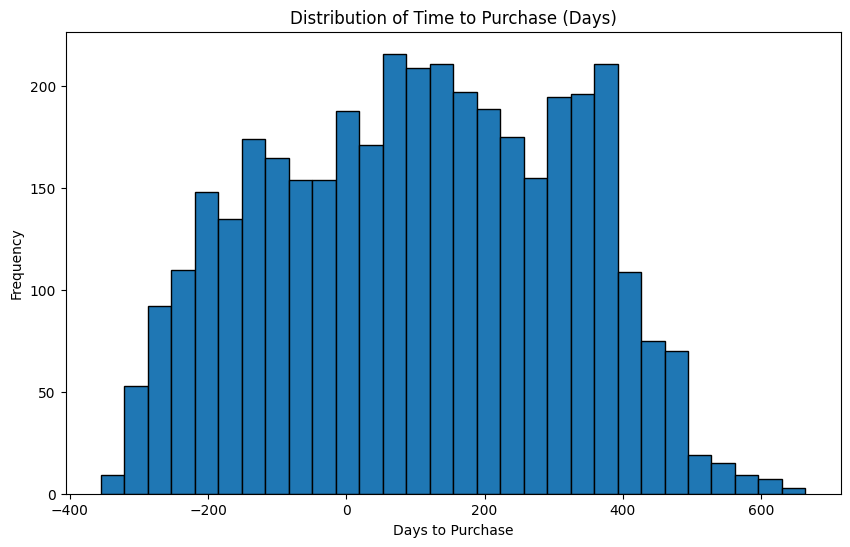

In [254]:
import matplotlib.pyplot as plt

# Plot the distribution of days_to_purchase
plt.figure(figsize=(10, 6))
plt.hist(aggregated_data['days_to_purchase'], bins=30, edgecolor='black')
plt.title('Distribution of Time to Purchase (Days)')
plt.xlabel('Days to Purchase')
plt.ylabel('Frequency')
plt.show()

 **Impact of Message Frequency**

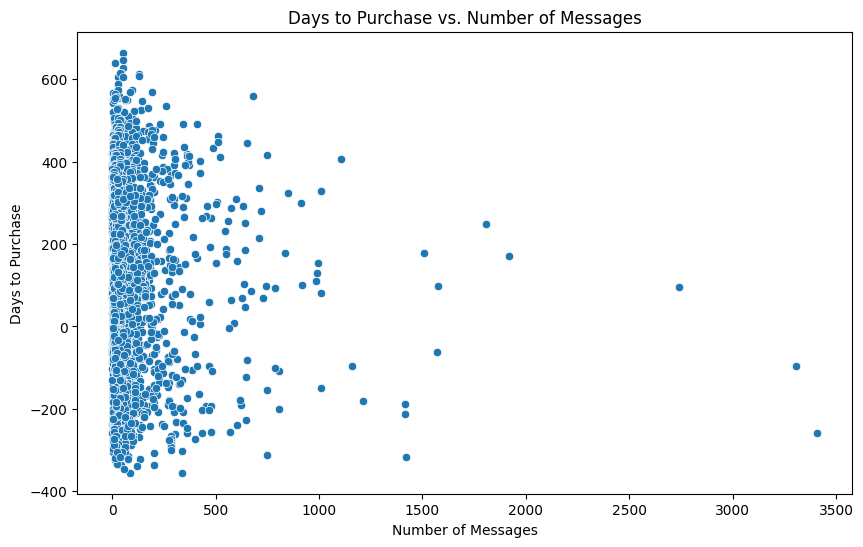

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of days_to_purchase with respect to number_of_messages
plt.figure(figsize=(10, 6))
sns.scatterplot(data=aggregated_data, x='number_of_messages', y='days_to_purchase')
plt.title('Days to Purchase vs. Number of Messages')
plt.xlabel('Number of Messages')
plt.ylabel('Days to Purchase')
plt.show()

In [305]:
# Calculate the correlation between number_of_messages and days_to_purchase
correlation = aggregated_data['number_of_messages'].corr(aggregated_data['days_to_purchase'])
print(f"Correlation between number_of_messages and days_to_purchase: {correlation}")

Correlation between number_of_messages and days_to_purchase: -0.03043477985315873


In [307]:
# Create bins for number of messages
bins = [0, 5, 10, 15, 20, 25]
labels = ['1-5', '6-10', '11-15', '16-20', '21-25']

# Assign bins to number_of_messages
aggregated_data['message_bins'] = pd.cut(aggregated_data['number_of_messages'], bins=bins, labels=labels)

# Group by message bins and calculate average days_to_purchase
message_effect = aggregated_data.groupby('message_bins').agg({
    'days_to_purchase': 'mean'
}).reset_index()

# Display the results
print(message_effect)

  message_bins  days_to_purchase
0          1-5        137.718654
1         6-10        110.033639
2        11-15        110.558989
3        16-20         54.191304
4        21-25         56.258993


C:\Users\Ellen\AppData\Local\Temp\ipykernel_23424\14249613.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  message_effect = aggregated_data.groupby('message_bins').agg({


**Comparison of Purchase Behavior (Pre/Post Communication)**

Analyzing whether customers who received a response (has_response) tend to make purchases sooner or spend more compared to those who did not.

In [328]:
# Group by 'has_response' and calculate average days to purchase and total purchase amount
purchase_comparison = aggregated_data.groupby('has_response').agg({
    'days_to_purchase': 'mean',
    'amount_including_vat': 'mean'
}).reset_index()

print(purchase_comparison)

  has_response  days_to_purchase  amount_including_vat
0        false         92.708874           2232.296291
1         true        134.247601           2458.363695


Summary Statistics by Response to Message:
               count        mean         std    min    25%    50%    75%  \
has_response                                                               
false         2772.0   92.708874  208.811951 -346.0 -79.00   94.0  263.0   
true          1042.0  134.247601  218.625666 -355.0 -47.25  144.5  319.5   

                max  
has_response         
false         664.0  
true          628.0  


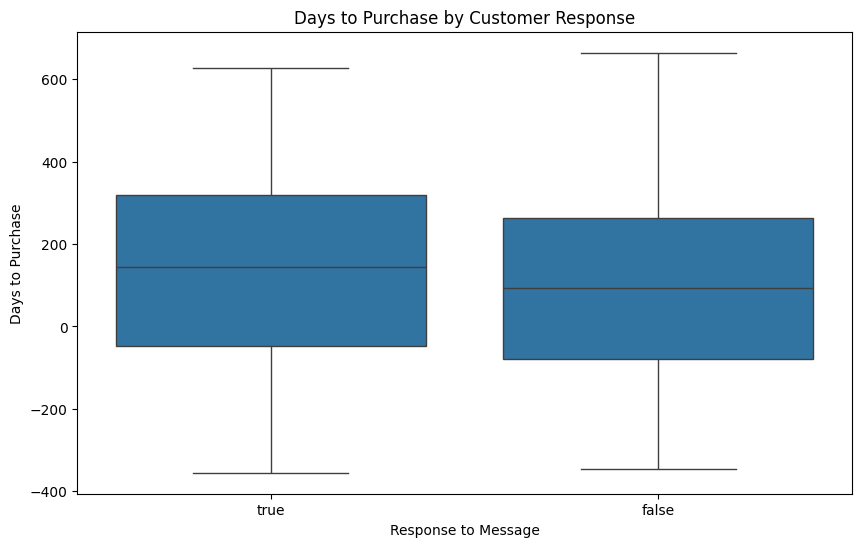

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'days_to_purchase' for responders vs non-responders
plt.figure(figsize=(10, 6))
sns.boxplot(x='has_response', y='days_to_purchase', data=aggregated_data)

# Title and labels
plt.title('Days to Purchase by Customer Response')
plt.xlabel('Response to Message')
plt.ylabel('Days to Purchase')

# Add summary statistics under the boxplot
response_summary = aggregated_data.groupby('has_response')['days_to_purchase'].describe()
print("Summary Statistics by Response to Message:")
print(response_summary)

# Show the plot
plt.show()

**Interpretation of Results:**

**Correlation:** The correlation between number_of_messages and days_to_purchase is **-0.03,** which is a very weak negative correlation. This suggests that there is **little to no relationship** between the number of messages and the time taken to purchase. Essentially, the more or fewer messages a customer receives doesn't significantly affect how quickly they make a purchase.

**- No clear trend:** **The correlation is low,** and the message bins show some variability but not a clear upward or downward trend that would suggest that the number of messages has a direct impact on how quickly customers make a purchase.

**Potential outliers or inconsistencies:** Although the data shows a general decline in purchase time after receiving 16-20 messages, the pattern doesn't fully support a consistent conclusion. It's possible that other factors, like the **type of product, customer preferences, or timing of the messages,** might play a larger role in purchasing behavior.